In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Google.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,8/7/2017 2:08:48,Google,L4,Software Engineer,300000,"Mountain View, CA",8.0,4.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,8/7/2017 11:19:56,Google,T6,Software Engineer,440000,"New York, NY",14.0,12.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,10/25/2017 10:30:54,Google,L4,Software Engineer,275000,"Mountain View, CA",4.0,0.0,NaN,160000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,11/14/2017 20:39:43,Google,T3,Software Engineer,158000,"Mountain View, CA",0.0,0.0,NaN,116000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,11/16/2017 18:40:36,Google,L4,Software Engineer,273000,"Sunnyvale, CA",1.0,1.0,NaN,131000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                     0
company                       0
level                         0
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                          84
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                     1369
otherdetails               1816
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       2999
Education                  2437
dtype: int64


# Data Processing

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)
df['gender'].replace(np.nan, 'Unknown', inplace=True)
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-08-07 02:08:48,Google,L4,Software Engineer,300000,"Mountain View, CA",8.0,4.0,NaN,155000.000000,112000,33000,Unknown,NaN,NaN
1,2017-08-07 11:19:56,Google,T6,Software Engineer,440000,"New York, NY",14.0,12.0,NaN,147145.020604,0,0,Unknown,NaN,NaN
2,2017-10-25 10:30:54,Google,L4,Software Engineer,275000,"Mountain View, CA",4.0,0.0,NaN,160000.000000,91000,24000,Unknown,NaN,NaN
3,2017-11-14 20:39:43,Google,T3,Software Engineer,158000,"Mountain View, CA",0.0,0.0,NaN,116000.000000,25000,17000,Unknown,NaN,NaN
4,2017-11-16 18:40:36,Google,L4,Software Engineer,273000,"Sunnyvale, CA",1.0,1.0,NaN,131000.000000,112000,30000,Unknown,NaN,NaN


In [4]:
undesired_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df = df[df['title'].apply(lambda x: x not in undesired_titles)]
# df = df.drop(['tag'], axis=1)
df = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-08-07 02:08:48,Google,L4,Software Engineer,300000,"Mountain View, CA",8.0,4.0,NaN,155000.000000,112000,33000,Unknown,Unknown,Unknown
1,2017-08-07 11:19:56,Google,T6,Software Engineer,440000,"New York, NY",14.0,12.0,NaN,147145.020604,0,0,Unknown,Unknown,Unknown
2,2017-10-25 10:30:54,Google,L4,Software Engineer,275000,"Mountain View, CA",4.0,0.0,NaN,160000.000000,91000,24000,Unknown,Unknown,Unknown
3,2017-11-14 20:39:43,Google,T3,Software Engineer,158000,"Mountain View, CA",0.0,0.0,NaN,116000.000000,25000,17000,Unknown,Unknown,Unknown
4,2017-11-16 18:40:36,Google,L4,Software Engineer,273000,"Sunnyvale, CA",1.0,1.0,NaN,131000.000000,112000,30000,Unknown,Unknown,Unknown


# Correlation

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [6]:
df_model = df[['title','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus','totalyearlycompensation']]
df_model.head()

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,Software Engineer,8.0,4.0,155000.000000,112000,33000,300000
1,Software Engineer,14.0,12.0,147145.020604,0,0,440000
2,Software Engineer,4.0,0.0,160000.000000,91000,24000,275000
3,Software Engineer,0.0,0.0,116000.000000,25000,17000,158000
4,Software Engineer,1.0,1.0,131000.000000,112000,30000,273000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2531/949237972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['title'] = le.fit_transform(df_model['title'])


In [8]:
df_model['title'].value_counts()

6    3111
5     295
7     172
9     147
4     141
1      90
2      80
0      56
8      50
3      13
Name: title, dtype: int64

In [9]:
df['title'].value_counts()

Software Engineer               3111
Product Manager                  295
Software Engineering Manager     172
Technical Program Manager        147
Product Designer                 141
Data Scientist                    90
Hardware Engineer                 80
Business Analyst                  56
Solution Architect                50
Management Consultant             13
Name: title, dtype: int64

In [10]:
corr_matrix = df_model.corr()

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

df_model.drop(to_drop, axis=1, inplace=True)

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2531/3134125425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop(to_drop, axis=1, inplace=True)


In [11]:
df_model.head(5)

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,6,8.0,4.0,155000.000000,112000,33000,300000
1,6,14.0,12.0,147145.020604,0,0,440000
2,6,4.0,0.0,160000.000000,91000,24000,275000
3,6,0.0,0.0,116000.000000,25000,17000,158000
4,6,1.0,1.0,131000.000000,112000,30000,273000


# Outlier

In [12]:
z = np.abs((df_model - df_model.mean()) / df_model.std())
outliers = z > 3
df_model = df_model[~outliers.any(axis=1)]

In [13]:
x = df_model.drop(['totalyearlycompensation'] , axis = 1).values
y = df_model['totalyearlycompensation'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear Rgression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(x_train , y_train)
lr.score(x_train , y_train)

0.8778210435709144

In [16]:
lr.score(x_test , y_test)

0.8517252222526247

In [17]:
y_pred = lr.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,247000,256374.091563
1,405000,419680.624757
2,59000,45233.267204
3,190000,198068.974286
4,220000,274661.372917
5,414000,382113.285919
6,280000,237392.373759
7,389000,412603.275058
8,370000,365070.555340
9,155000,155919.993930


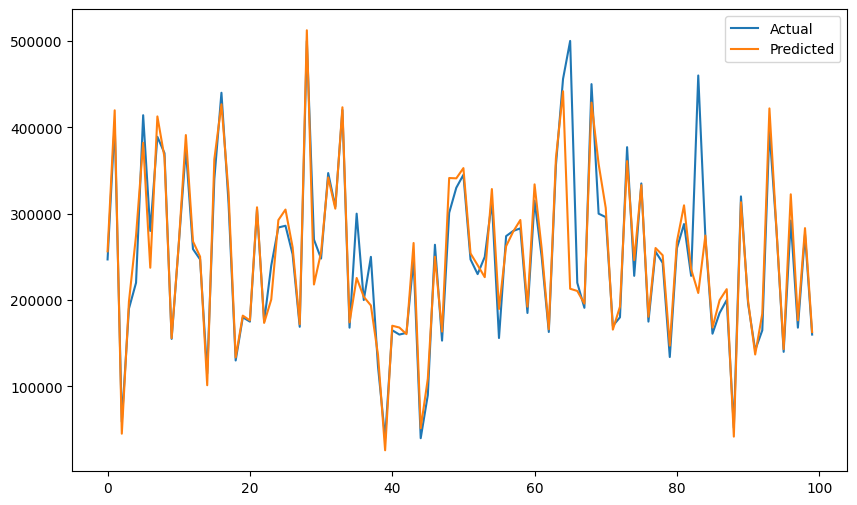

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:100])
plt.legend(['Actual' , 'Predicted'])

In [19]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1845400244.0986998

In [20]:
rsq = r2_score(y_test,y_pred)
rsq

0.8517252222526247

In [21]:
df_2 = df_1.sort_values(by = ['Y_pred'], ascending = False)
df_2.head(5)

,Y_test,Y_pred
389,700000,650917.568467
590,710000,645576.617758
615,670000,633034.324229
222,650000,610859.094005
737,650000,607722.883813


# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_train , y_train)

0.9462052667828976

In [23]:
knn.score(x_test , y_test)

0.8990948554282484

In [24]:
y_pred = knn.predict(x_test)
df_3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_3.head(10)

,Y_test,Y_pred
0,247000,257600.0
1,405000,431000.0
2,59000,52200.0
3,190000,216200.0
4,220000,226400.0
5,414000,395800.0
6,280000,234600.0
7,389000,370200.0
8,370000,365200.0
9,155000,157800.0


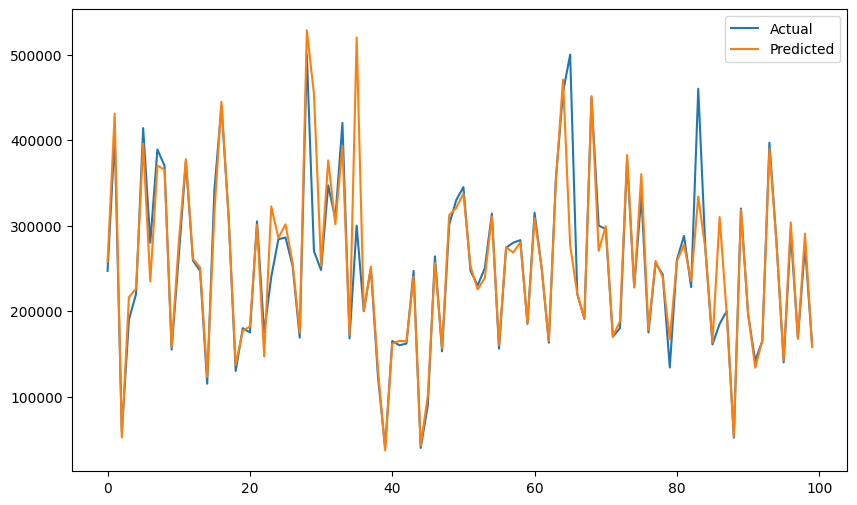

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_3[:100])
plt.legend(['Actual' , 'Predicted'])

In [26]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1255846619.7183099

In [27]:
rsq = r2_score(y_test,y_pred)
rsq

0.8990948554282484

In [28]:
df_4 = df_3.sort_values(by = ['Y_pred'], ascending = False)
df_4.head(5)

,Y_test,Y_pred
590,710000,679000.0
439,635000,651200.0
188,625000,645800.0
222,650000,638400.0
615,670000,627000.0


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2, max_depth=4)
rf.fit(x_train , y_train) 
rf.score(x_train , y_train)

0.13632930513595165

In [30]:
rf.score(x_test , y_test)

0.09330985915492958

In [31]:
y_pred = rf.predict(x_test)
df_5 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_5.head(10)

,Y_test,Y_pred
0,247000,250000
1,405000,400000
2,59000,150000
3,190000,200000
4,220000,200000
5,414000,400000
6,280000,200000
7,389000,400000
8,370000,400000
9,155000,150000


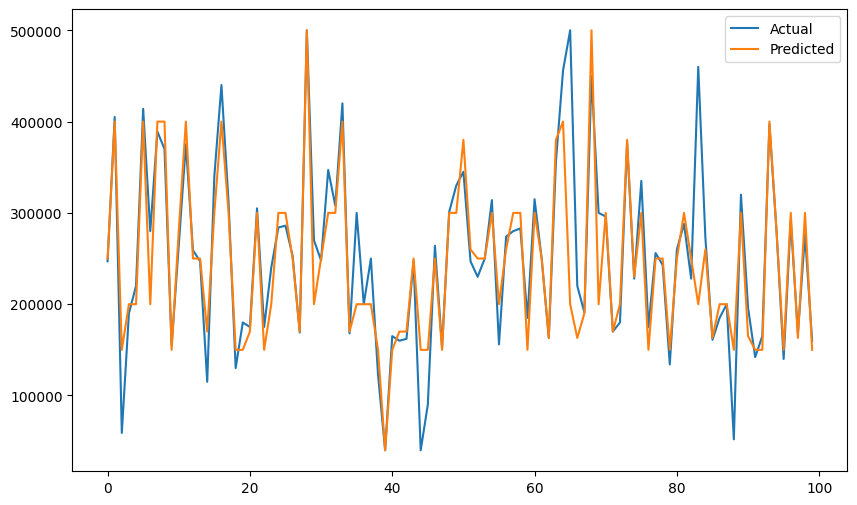

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df_5[:100])
plt.legend(['Actual' , 'Predicted'])

In [33]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

2736966549.2957745

In [34]:
rsq = r2_score(y_test,y_pred)
rsq

0.7800893827251891

In [35]:
df_6 = df_5.sort_values(by = ['Y_pred'], ascending = False)
df_6.head(5)

,Y_test,Y_pred
102,623000,600000
659,540000,550000
780,530000,550000
653,550000,550000
570,550000,550000


# Neural Net

In [36]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7660805633040355

In [37]:
mlp.score(x_test , y_test)

0.7556016391992214

In [38]:
y_pred = rf.predict(x_test)
df_7 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_7.head(10)

,Y_test,Y_pred
0,247000,250000
1,405000,400000
2,59000,150000
3,190000,200000
4,220000,200000
5,414000,400000
6,280000,200000
7,389000,400000
8,370000,400000
9,155000,150000


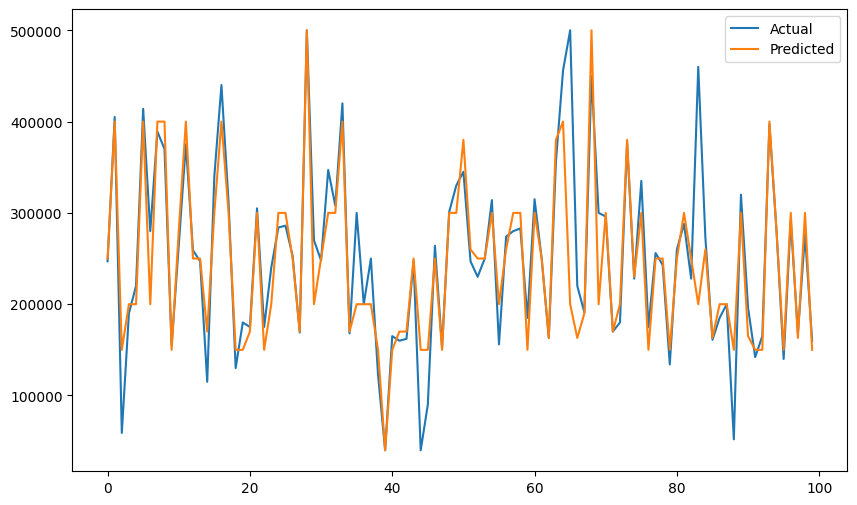

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_7[:100])
plt.legend(['Actual' , 'Predicted'])

In [40]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

2736966549.2957745

In [41]:
rsq = r2_score(y_test,y_pred)
rsq

0.7800893827251891

In [42]:
df_8 = df_7.sort_values(by = ['Y_pred'], ascending = False)
df_8.head(5)

,Y_test,Y_pred
102,623000,600000
659,540000,550000
780,530000,550000
653,550000,550000
570,550000,550000


# SVM

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
svm.score(x_train, y_train)

0.042825802347569386

In [44]:
svm.score(x_test , y_test)

0.05367943372126249

In [45]:
y_pred = svm.predict(x_test)
df_9 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_9.head(10)

,Y_test,Y_pred
0,247000,249951.013360
1,405000,258281.559613
2,59000,241594.058713
3,190000,245724.068884
4,220000,250263.495260
5,414000,256280.620366
6,280000,246458.305547
7,389000,258521.244643
8,370000,253396.620933
9,155000,245595.377476


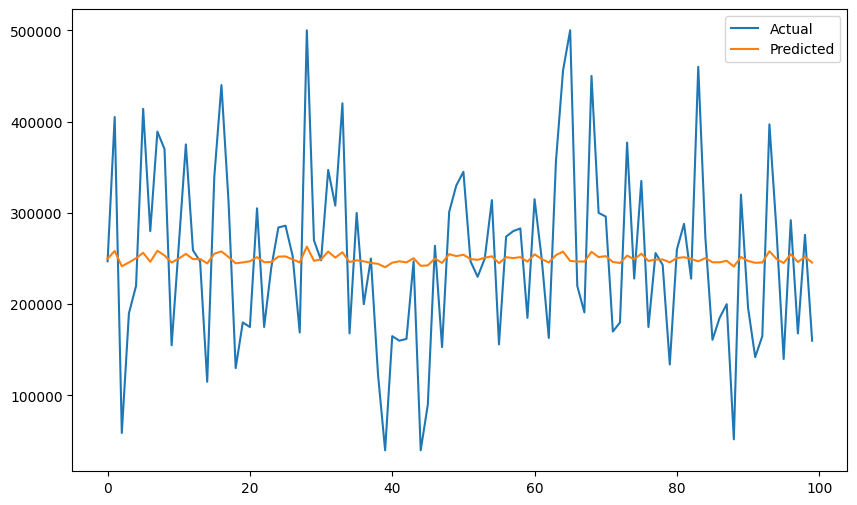

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df_9[:100])
plt.legend(['Actual' , 'Predicted'])

In [47]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

11777729365.285225

In [48]:
rsq = r2_score(y_test,y_pred)
rsq

0.05367943372126249

In [49]:
df_10 = df_9.sort_values(by = ['Y_pred'], ascending = False)
df_10.head(5)

,Y_test,Y_pred
102,623000,268571.473539
590,710000,268064.895073
389,700000,267202.716223
615,670000,266276.302425
1106,580000,266029.403395


# Gain Chart

In [52]:
y_test_methods = [df_2['Y_test'], df_4['Y_test'], df_6['Y_test'], df_8['Y_test']]
y_pred_methods = [df_2['Y_pred'], df_4['Y_pred'], df_6['Y_pred'], df_8['Y_pred']]

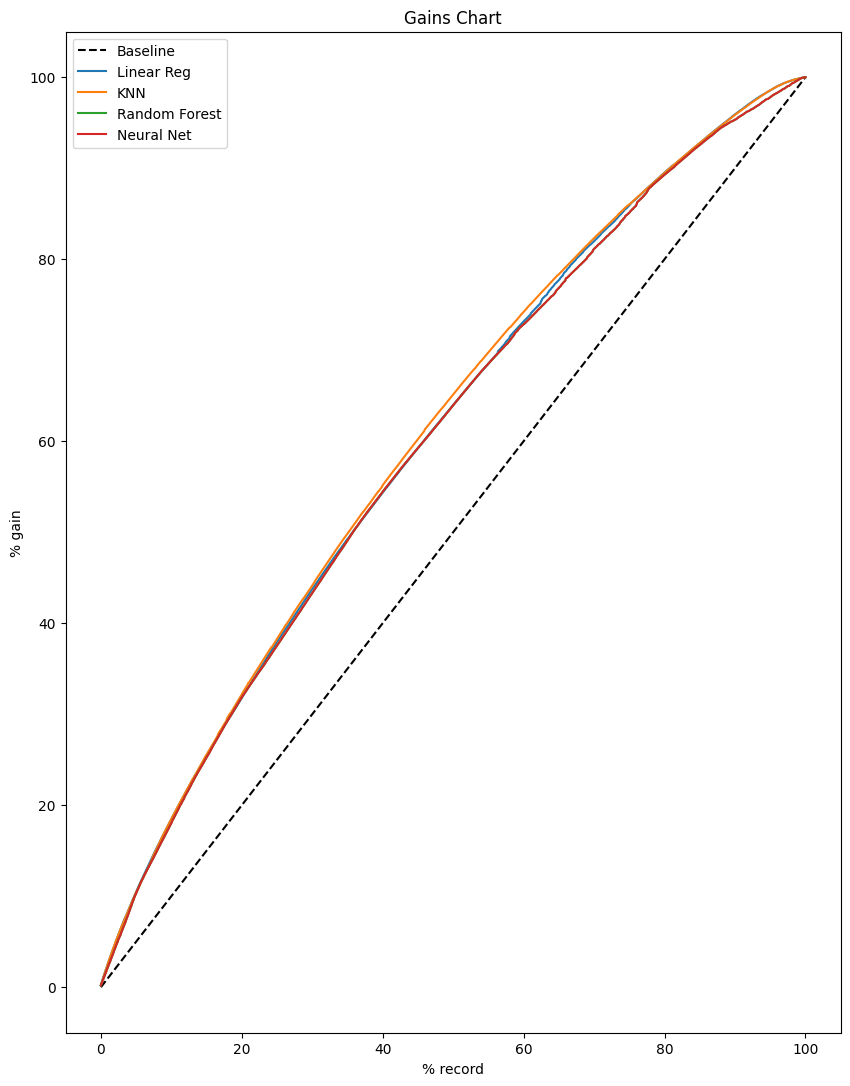

In [53]:
def cumulative_gain(y_test, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    sorted_labels = y_test.iloc[sorted_indices]
    cumulative_gains = np.cumsum(sorted_labels) / np.sum(sorted_labels)
    return cumulative_gains

# calculate the cumulative gain for each method
gains = []
for i in range(len(y_test_methods)):
    gains.append(cumulative_gain(y_test_methods[i], y_pred_methods[i]))

# plot the cumulative gain chart
plt.figure(figsize=(10, 13))
plt.plot(np.linspace(0, 100, len(y_test_methods[0])), np.linspace(0, 100, len(y_test_methods[0])), 'k--', label='Baseline')
for i in range(len(gains)):
    plt.plot(np.linspace(0, 100, len(y_test_methods[0])), gains[i]*100, label=f'{["Linear Reg", "KNN", "Random Forest", "Neural Net", "SVM"][i]}')
plt.xlabel('% record')
plt.ylabel('% gain')
plt.title('Gains Chart')
plt.legend()
plt.show()